<a href="https://colab.research.google.com/github/Rezi277/Latihan10.3-ML/blob/main/Latihan10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
df3 = pd.read_csv('/content/drive/MyDrive/Latihan-2.ML/Praktikum10.ML/Data/weather_classification_data.csv')
df3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
print(df3['Weather Type'].unique())
print(df3['Season'].unique())
print(df3['Cloud Cover'].unique())
print(df3['Location'].unique())

['Rainy' 'Cloudy' 'Sunny' 'Snowy']
['Winter' 'Spring' 'Summer' 'Autumn']
['partly cloudy' 'clear' 'overcast' 'cloudy']
['inland' 'mountain' 'coastal']


In [ ]:
replacements = {
    'Weather Type': {'Rainy': 0, 'Cloudy': 1, 'Sunny': 2, 'Snowy': 3},
    'Season': { 'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3},
    'Cloud Cover': {'partly cloudy': 0, 'clear': 1, 'overcast': 2, 'cloudy': 3},
    'Location': {'inland':0, 'mountain':1, 'coastal': 2}
}
df3 = df3.replace(replacements, inplace=False)
df3.head()

/tmp/ipython-input-4120268787.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3 = df3.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0


In [ ]:
df3.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
X = df3.drop(columns=['Weather Type'])
y = df3['Weather Type']

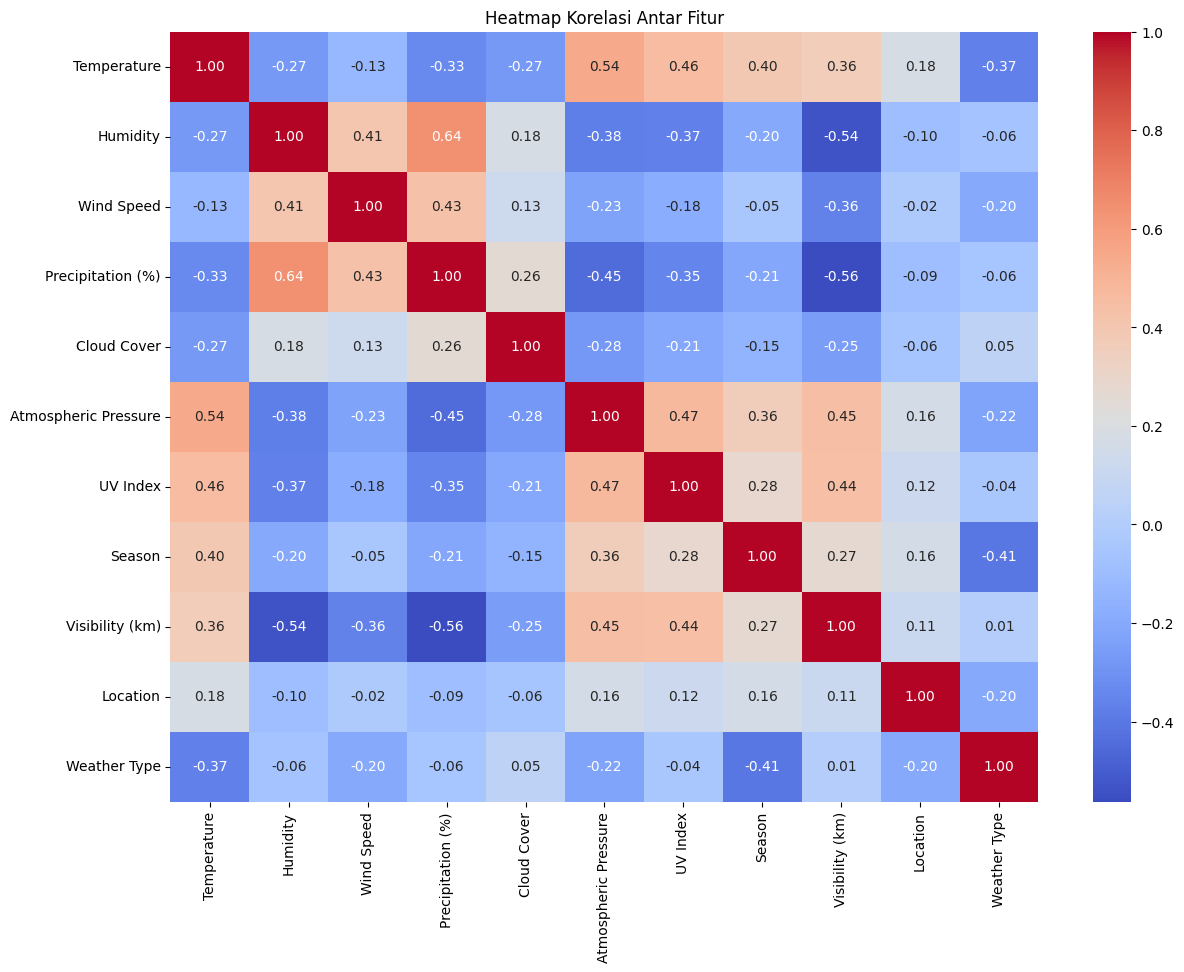

In [ ]:
correlation_matrix = df3.corr(method='spearman')

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

/tmp/ipython-input-2166511670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df3, palette='Set2')


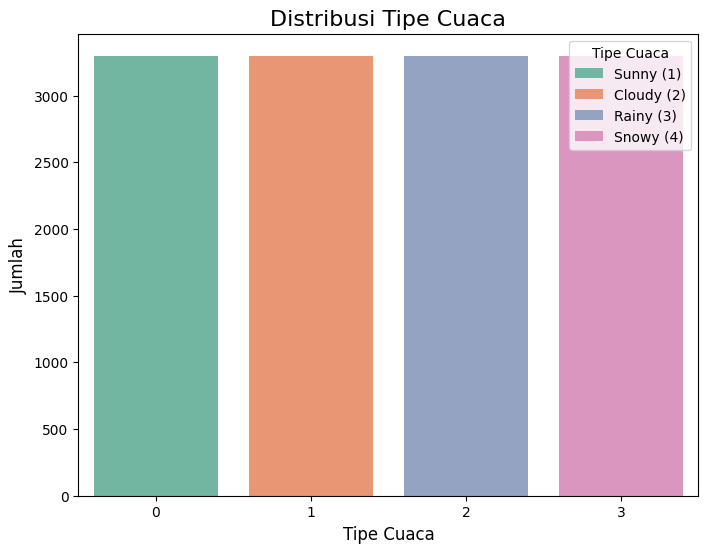

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df3, palette='Set2')

plt.title('Distribusi Tipe Cuaca', fontsize=16)
plt.xlabel('Tipe Cuaca', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.legend(title ='Tipe Cuaca', labels=['Sunny (1)', 'Cloudy (2)', 'Rainy (3)', 'Snowy (4)'], loc='upper right')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE (random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)
print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
2    2659
0    2653
1    2649
3    2599
Name: count, dtype: int64
After SMOTE:
Weather Type
0    2659
2    2659
1    2659
3    2659
Name: count, dtype: int64


In [ ]:
param_grid = {
    'n_neighbors': list (range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best score: 0.897424052020036


In [ ]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

y_pred = best_knn.predict(x_test_scaled)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       647
           1       0.88      0.87      0.88       651
           2       0.91      0.87      0.89       641
           3       0.93      0.94      0.94       701

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



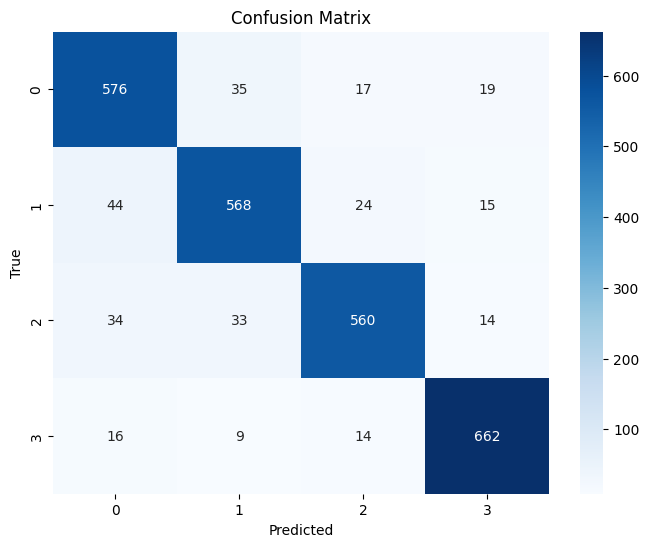

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.897424052020036
Std Dev: 0.00617952088247341


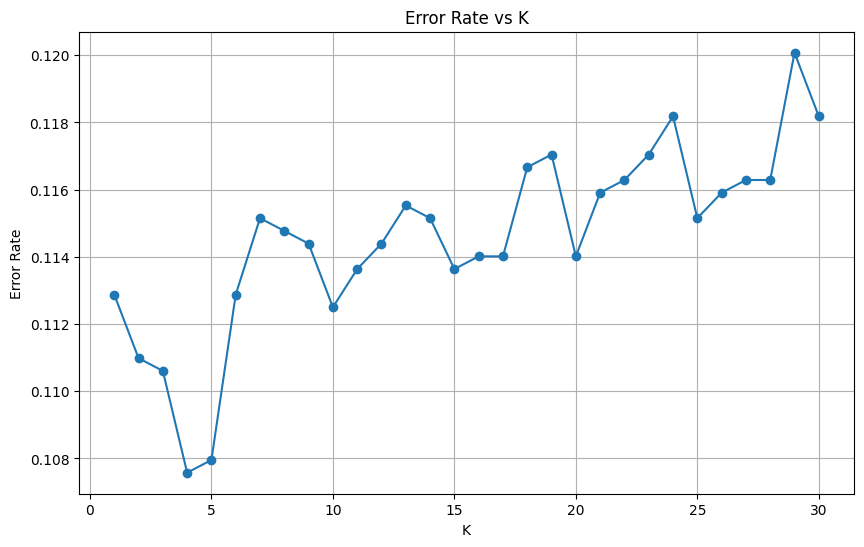

In [ ]:
errors = []

for k in range(1, 31):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train_smote, y_train_smote)
  pred = knn_temp.predict(x_test_scaled)
  errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1,31), errors, marker='o')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.grid(True)
plt.show()